## Подготовка и анализ данных
* Импорт необходимых бибилотек для работы с данными

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")
os.chdir('E:\\movieLens dataset')

* Загрузка выборки данных и преобразование в таблицу

In [2]:
data = pd.read_csv('u.data', sep='\t', names=['userId', 'movieId', 'rating', 'timestamp'])
movie = pd.read_csv('u.item', sep='\|', header=None)
movie = movie[[0, 1, 2]]
movie.columns = ['movieId', 'title', 'date']

* Проверяем информацию о количестве пользователей, фильмов и оценок

In [3]:
print('Кол-во пользователей: ', len(data.userId.unique()))
print('Кол-во фильмов: ', len(data.movieId.unique()))
print('Кол-во оценок: ', data.rating.count())

Кол-во пользователей:  943
Кол-во фильмов:  1682
Кол-во оценок:  100000


* Средние оценки и количество оценок для каждого фильма

In [4]:
df = pd.merge(data, movie, on='movieId')
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])
ratings['number of ratings'] = pd.DataFrame(df.groupby("title").count()["rating"])
ratings.sort_values(by='number of ratings', ascending=False).head(10)

,rating,number of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


* Подсчет среднего числа оценок для фильмов и пользователей

In [5]:
print('Среднее число оценок, оставленные фильмам =', int(np.round(ratings['number of ratings'].mean(), 0)))
print('Среднее число оценок, которые оставили пользователи =',
      int(np.round(data.groupby('userId')['rating'].count().mean(), 0)))

Среднее число оценок, оставленные фильмам = 60
Среднее число оценок, которые оставили пользователи = 106


* Построение гистограмм распределения оценок

<function matplotlib.pyplot.show(*args, **kw)>

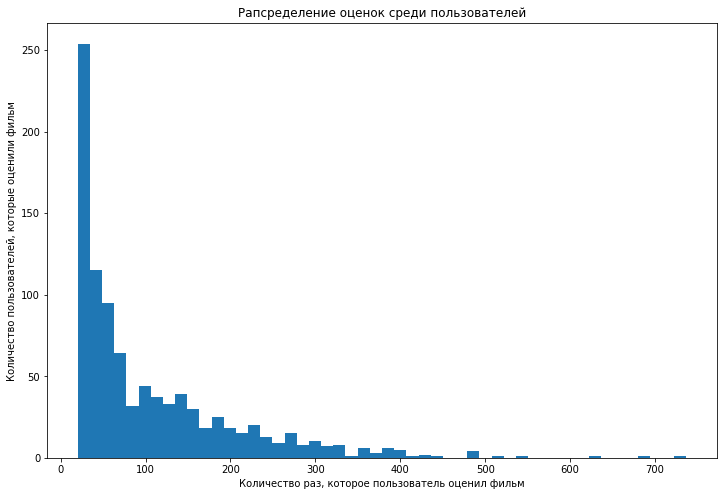

In [6]:
plt.figure(figsize=(12,8))
plt.hist(data.groupby('userId')['rating'].count(), bins=50)
plt.xlabel('Количество раз, которое пользователь оценил фильм')
plt.ylabel('Количество пользователей, которые оценили фильм')
plt.title('Рапсределение оценок среди пользователей')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

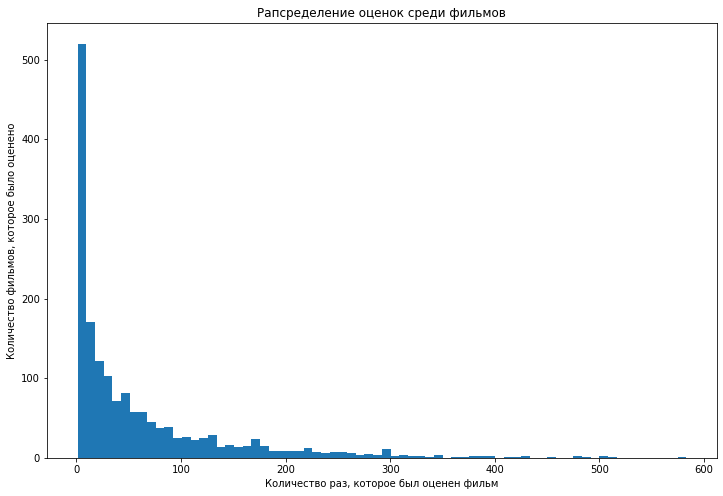

In [7]:
plt.figure(figsize=(12,8))
plt.hist(ratings['number of ratings'], bins=70,)
plt.xlabel('Количество раз, которое был оценен фильм')
plt.ylabel('Количество фильмов, которое было оценено')
plt.title('Рапсределение оценок среди фильмов')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

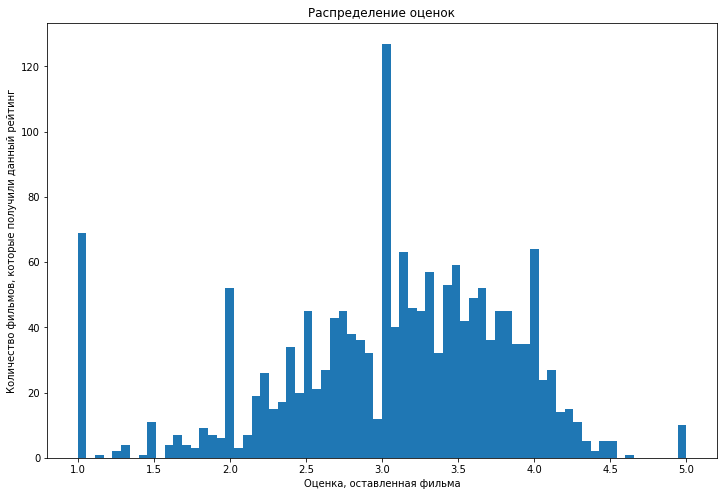

In [8]:
plt.figure(figsize=(12,8))
plt.hist(ratings['rating'],bins=70)
plt.xlabel('Оценка, оставленная фильма')
plt.ylabel('Количество фильмов, которые получили данный рейтинг')
plt.title('Распределение оценок')
plt.show

* Удаление пользователей, которые оставили меньше 3 оценок фильмам

In [9]:
temp = data.groupby('movieId').count()['rating'].sort_values(ascending=False).to_frame()
less3 = temp[temp['rating']<3]
data_less3 = data[~data['movieId'].isin(less3.index)]

In [10]:
print('Количество пользователей, которое мы потеряем после их удаления:',
      len(data['movieId'].unique()) - len(data_less3['movieId'].unique()),
      '\nКоличество пользователей в процентах:',
       np.round((1 - len(data_less3['movieId'].unique()) / len(data['movieId'].unique()))*100, 3), '%')


Количество пользователей, которое мы потеряем после их удаления: 209 
Количество пользователей в процентах: 12.426 %


* Построение сводной таблицы оценок, где столбец - номер фильма, а строка - номер пользователя

In [11]:
pivot = pd.pivot_table(data=data, index='userId', columns='movieId', values='rating')
pivot

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,2.0,NaN,NaN,4.0,5.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,5.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* Преобразование таблицы в вид, с которым далее будем работать

In [77]:
pivot['userId'] = pivot.index
unpivot = pd.melt(pivot, id_vars=['userId'])
unpivot.columns=['userId', 'movieId', 'rating']
unpivot.dropna(inplace=True)
unpivot.head()

,userId,movieId,rating
0,1,1,5.0
1,2,1,4.0
4,5,1,4.0
5,6,1,4.0
9,10,1,4.0


## Построение рекомендательной системы (РС)
* Импорт библиотек для построения РС

In [29]:
from surprise import Dataset
from surprise import Reader
from surprise import SVD  
from surprise.model_selection import cross_validate, train_test_split
from collections import defaultdict
from surprise import accuracy
from surprise.model_selection import GridSearchCV
from scipy.sparse import csr_matrix

* Преобразование данных к виду, с которым работает библиотека Surprise

In [78]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(unpivot[['userId', 'movieId', 'rating']], reader)

* Создание тренировочной и тестовой выборок

In [79]:
trainset = data.build_full_trainset()
testset = trainset.build_anti_testset()

* Задание диапазона параметров, среди которых будем искать оптимальные для последующего применения в созддании модели. 
Функция GridSearchCV будет искать оптимальные параметры с точки зрения метрик RMSE и MAE

In [49]:
param_grid = {'n_factors': [20, 50, 70, 100, 200, 300, 400],
              'n_epochs': [20, 30, 50, 70, 100],
              'lr_all': [0.002, 0.005, 0.01, 0.05, 0.1],
              'reg_all': [0.01, 0.05, 0.1, 0.15]}

In [90]:
gs = GridSearchCV(SVD, param_grid, measures = ['rmse', 'mae'], cv = 4)
gs.fit(data)

* Получаем оптимальные параметры и точность, которая получилась с использованием оптимальных параметров

In [91]:
gs.best_params['rmse']

{'n_factors': 200, 'n_epochs': 50, 'lr_all': 0.01, 'reg_all': 0.1}

In [92]:
gs.best_score

{'rmse': 0.912571231299141, 'mae': 0.7213059487844762}

* Создаем модель algo, передаем наши параметры, обучаем и получаем предсказания

In [80]:
algo = SVD(n_factors=200, n_epochs=50, lr_all=0.01, reg_all=0.1, verbose=False)
predictions = algo.fit(trainset).test(testset)

* С помощью кросс-валидации получаем значение RMSE на всей выборке после обучения и тестирования

In [61]:
err = cross_validate(algo, data, measures=['RMSE'], cv=3, verbose=False)
np.mean(err['test_rmse'])

0.9185206114750794

* Выводим первые 5 предсказаний для пользователя 1

In [95]:
predictions[:][3030]

Prediction(uid=5, iid=3, r_ui=3.52986, est=2.565836076726442, details={'was_impossible': False})

In [97]:
unpivot1 = unpivot.copy()
for i in predictions[:5000]:
    unpivot1 = unpivot1.append({'userId':i.uid, 'movieId': i.iid, 'rating': i.est}, ignore_index=True)

In [99]:
unpivot1 = pd.pivot_table(data=unpivot1, index='userId', columns='movieId', values='rating')
unpivot1.head(2)

movieId,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
userId,,,,,,,,,,,,,,,,,,,,,
1.0,5.0,3.000000,4.000000,3.000000,3.000000,5.000000,4.000000,1.000000,5.000000,3.0,...,3.263483,3.703334,3.374929,2.848633,3.660642,3.012690,3.429491,3.296618,3.668881,3.492308
2.0,4.0,3.428119,2.974897,3.712407,3.457191,4.045835,3.966364,4.009462,4.197645,2.0,...,3.323060,3.736338,3.374048,3.050597,3.513095,3.234704,3.520193,3.257977,3.532810,3.663817


* Создаем функцию, которая будет выводить топ фильмов, которые можно рекомендовать пользователю

In [27]:
def get_top_n_movies(num_user, pred, n):
    '''
    Функция, которая выводит топ фильмов, которые можно рекомендовать пользователю
    num_user - номер пользователя, для которого нужно получить рекомендации, type int
    pred - Список с предсказаниями оценок, которые были получены в результате работы функции test(), type list
    n - число фильмов, которое необходимо порекомендовать, type int
    Возвращает таблицу, в которой содержится информация о пользователе, фильме и оценка, которая была предсказана моделью
    '''
    top_n = defaultdict(list)
    for uid, iid, true_r,est, _ in pred:
        top_n[uid].append((iid,est))
        
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key = lambda x:x[1], reverse = True)
        top_n[uid] = user_ratings[:n]
    info = []
    for i in range(n):
        info.append([num_user,
                     top_n[num_user][i][0],
                     movie.iloc[top_n[num_user][i][0]]['title'],
                    top_n[num_user][i][1]])
    recommendation = pd.DataFrame(info, columns=['userId', 'movieId', 'title', 'rating'])
    return recommendation

* Выведем 5 фильмов, которые можно порекомендовать пользователю 837

In [98]:
top_n = get_top_n_movies(3, predictions, 5)
top_n

,userId,movieId,title,rating
0,3,1449,Golden Earrings (1947),4.356862
1,3,902,Afterglow (1997),4.131667
2,3,127,Supercop (1992),4.062671
3,3,483,"Maltese Falcon, The (1941)",4.062312
4,3,50,Legends of the Fall (1994),4.018568


* Выведем для сравнения топ 5 фильмов, оцененных пользователем 837

In [67]:
alr_rated = pd.merge(unpivot, movie, on=['movieId'])
alr_rated[alr_rated['userId']==837].sort_values(by='rating', ascending=False)[0:5]

,userId,movieId,rating,title,date
43590,837,283,5.0,Emma (1996),02-Aug-1996
92528,837,1009,5.0,Stealing Beauty (1996),14-Jun-1996
45229,837,289,5.0,Evita (1996),25-Dec-1996
82250,837,740,5.0,Jane Eyre (1996),05-Apr-1996
17751,837,125,5.0,Phenomenon (1996),29-Jun-1996
